# Lower Back Pain Symptoms Dataset
### In this project, we use various classification methods to identify a person is abnormal or normal using collected physical spine features.

### Methods:
- K nearest neighbours
- Logistic regression 
- SVM
- Decision trees

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv("Dataset_spine.csv") # import data
df = df.drop(df.columns[13], axis = 1) # delete the last column

In [3]:
# check out the data
print (df.shape)
df.head()

(310, 13)


,Col1,Col2,Col3,Col4,Col5,Col6,Col7,Col8,Col9,Col10,Col11,Col12,Class_att
0,63.027818,22.552586,39.609117,40.475232,98.672917,-0.254400,0.744503,12.5661,14.5386,15.30468,-28.658501,43.5123,Abnormal
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,0.415186,12.8874,17.5323,16.78486,-25.530607,16.1102,Abnormal
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,0.474889,26.8343,17.4861,16.65897,-29.031888,19.2221,Abnormal
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,0.369345,23.5603,12.7074,11.42447,-30.470246,18.8329,Abnormal
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,0.543360,35.4940,15.9546,8.87237,-16.378376,24.9171,Abnormal


## Explanatory Data Analysis

In [3]:
# set Abnormal = 0 and Normal = 1
df['Class'] = df['Class_att'].replace(['Abnormal','Normal'], [0, 1])
# rename col1 - col 12
df.columns = ['Pelvic Incidence','Pelvic Tilt','Lumbar Lordosis Angle','Sacral Slope',
             'Pelvic Radius', 'Spondylolisthesis Degree', 'Pelvic Slope', 'Direct Tilt', 
             'Thoracic Slope', 'Cervical Tilt','Sacrum Angle', 'Scoliosis Slope', 'Class_name', 'Class']
df.head()

,Pelvic Incidence,Pelvic Tilt,Lumbar Lordosis Angle,Sacral Slope,Pelvic Radius,Spondylolisthesis Degree,Pelvic Slope,Direct Tilt,Thoracic Slope,Cervical Tilt,Sacrum Angle,Scoliosis Slope,Class_name,Class
0,63.027818,22.552586,39.609117,40.475232,98.672917,-0.254400,0.744503,12.5661,14.5386,15.30468,-28.658501,43.5123,Abnormal,0
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,0.415186,12.8874,17.5323,16.78486,-25.530607,16.1102,Abnormal,0
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,0.474889,26.8343,17.4861,16.65897,-29.031888,19.2221,Abnormal,0
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,0.369345,23.5603,12.7074,11.42447,-30.470246,18.8329,Abnormal,0
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,0.543360,35.4940,15.9546,8.87237,-16.378376,24.9171,Abnormal,0


* Based on the barplot, we can see there are more observations from "Abnormal" class than "Normal" class. 
* Since the data is imbalanced, we need to be careful when choosing the metric to evaluate the performance of the models. 

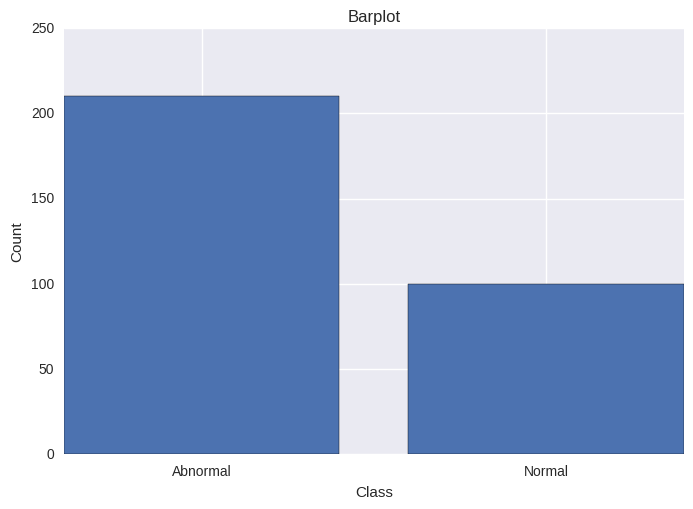

0    210
1    100
Name: Class, dtype: int64


In [5]:
# Use barplot to check number of observations in each class
counts = df['Class'].value_counts()

plt.bar(range(len(counts)), counts, align='center')
plt.xticks(range(len(counts)), ['Abnormal', 'Normal'])
plt.title("Barplot")
plt.xlabel("Class")
plt.ylabel("Count")
plt.show()

print(counts)

The correlation heatmap shows that some features are correlated. Some of the features might be redundant and we can try some feature selection method like Lasso.

In [6]:
# check correlation among features
corrmat = df.iloc[:, :-1].corr()
corrmat

,Pelvic Incidence,Pelvic Tilt,Lumbar Lordosis Angle,Sacral Slope,Pelvic Radius,Spondylolisthesis Degree,Pelvic Slope,Direct Tilt,Thoracic Slope,Cervical Tilt,Sacrum Angle,Scoliosis Slope
Pelvic Incidence,1.000000,0.629199,0.717282,0.814960,-0.247467,0.638743,0.043290,-0.078411,-0.089740,0.016750,0.019240,-0.007251
Pelvic Tilt,0.629199,1.000000,0.432764,0.062345,0.032668,0.397862,0.008852,-0.072119,-0.063394,0.028931,0.032859,-0.056550
Lumbar Lordosis Angle,0.717282,0.432764,1.000000,0.598387,-0.080344,0.533667,0.029486,-0.112939,-0.063582,0.063875,0.057199,-0.049054
Sacral Slope,0.814960,0.062345,0.598387,1.000000,-0.342128,0.523557,0.048988,-0.046914,-0.067968,-0.000063,0.000207,0.032853
Pelvic Radius,-0.247467,0.032668,-0.080344,-0.342128,1.000000,-0.026065,0.015767,0.063433,0.060477,-0.039800,0.029738,-0.030145
Spondylolisthesis Degree,0.638743,0.397862,0.533667,0.523557,-0.026065,1.000000,0.085925,-0.063812,-0.057286,0.056576,0.023021,-0.041023
Pelvic Slope,0.043290,0.008852,0.029486,0.048988,0.015767,0.085925,1.000000,0.012694,-0.011770,0.088017,0.060743,-0.073893
Direct Tilt,-0.078411,-0.072119,-0.112939,-0.046914,0.063433,-0.063812,0.012694,1.000000,0.009887,0.072738,-0.037428,-0.024021
Thoracic Slope,-0.089740,-0.063394,-0.063582,-0.067968,0.060477,-0.057286,-0.011770,0.009887,1.000000,0.052451,0.011354,0.009541
Cervical Tilt,0.016750,0.028931,0.063875,-0.000063,-0.039800,0.056576,0.088017,0.072738,0.052451,1.000000,0.057451,0.021243


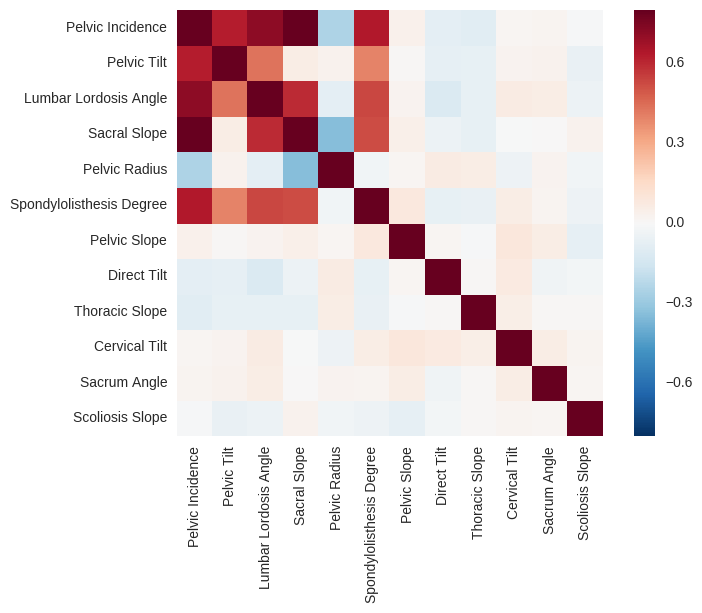

In [7]:
sns.heatmap(corrmat, vmax=.8, square=True)

## Create training and testing set

- Split data into training and testing set
- We pick $75\%$ of the data to train the model and leave $25\%$ data to evaluate the prediction performance of the model.
- We do not scale the entire dataset with sigle transform, since this will indirectly leak information into the training data about the whole dataset, including the test data. 
- We first scale the training data, then use the mean and sd from training data to scale the test data.

In [4]:
X = df.iloc[:, 0:12]
y = df.iloc[:, 13:14]

## set random_state so the results can be replicated
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0) 

## feature scaling
#from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
#scaler = MinMaxScaler()
scaler = StandardScaler()

scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

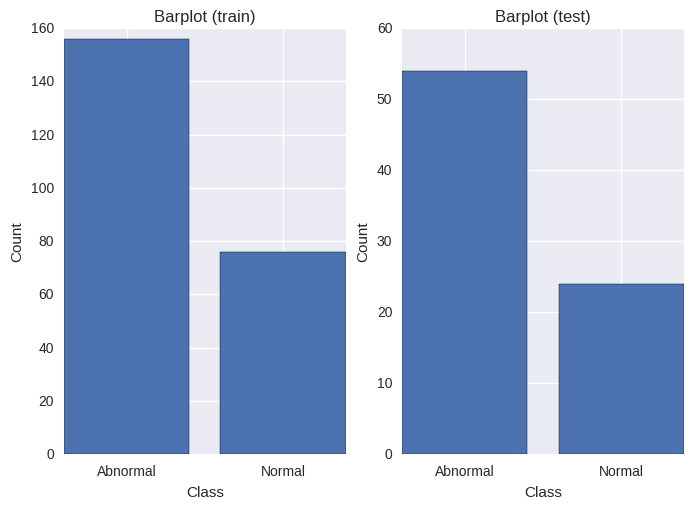

0    156
1     76
Name: Class, dtype: int64
0    54
1    24
Name: Class, dtype: int64


In [9]:
# check the distribution for training and testing set
counts_train = y_train['Class'].value_counts()
counts_test = y_test['Class'].value_counts()

plt.subplot(1, 2, 1)
plt.bar(range(len(counts_train)), counts_train, align='center')
plt.xticks(range(len(counts_train)), ['Abnormal', 'Normal'])
plt.title("Barplot (train)")
plt.xlabel("Class")
plt.ylabel("Count")

plt.subplot(1, 2, 2)
plt.bar(range(len(counts_test)), counts_test, align='center')
plt.xticks(range(len(counts_test)), ['Abnormal', 'Normal'])
plt.title("Barplot (test)")
plt.xlabel("Class")
plt.ylabel("Count")

plt.show()

print (counts_train)
print (counts_test)

## K nearest neighbor classifier

### Choose parameter k using cross validation

In [5]:
# data needs to be in ndarray format 
y_train = pd.DataFrame.as_matrix(y_train).ravel()

In [104]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_auc_score

metrics = ['accuracy', 'precision', 'recall', 'roc_auc', 'f1']
#metrics = ['accuracy', 'recall']
neighbors = [x for x in range(80) if x % 2 != 0]
grid_values = {'n_neighbors': neighbors}

knn_cv = KNeighborsClassifier()

for metric in metrics:
    print ("Tuning hyper-parameter K using %s" % metric)
    
    grid_knn = GridSearchCV(knn_cv, param_grid = grid_values, cv = 5, scoring = '%s' % metric)
    grid_knn.fit(X_train_scaled, y_train)
    
    print('Grid best parameter (max. %s): ' % metric , grid_knn.best_params_)
    print('Grid best score (%s): ' % metric , grid_knn.best_score_, '\n')
   
    

Tuning hyper-parameter K using accuracy
Grid best parameter (max. accuracy):  {'n_neighbors': 11}
Grid best score (accuracy):  0.788793103448 

Tuning hyper-parameter K using precision
Grid best parameter (max. precision):  {'n_neighbors': 55}
Grid best score (precision):  0.749668171866 

Tuning hyper-parameter K using recall
Grid best parameter (max. recall):  {'n_neighbors': 11}
Grid best score (recall):  0.736781609195 

Tuning hyper-parameter K using roc_auc
Grid best parameter (max. roc_auc):  {'n_neighbors': 39}
Grid best score (roc_auc):  0.839277582731 

Tuning hyper-parameter K using f1
Grid best parameter (max. f1):  {'n_neighbors': 11}
Grid best score (f1):  0.69363959795 



### Validation curve

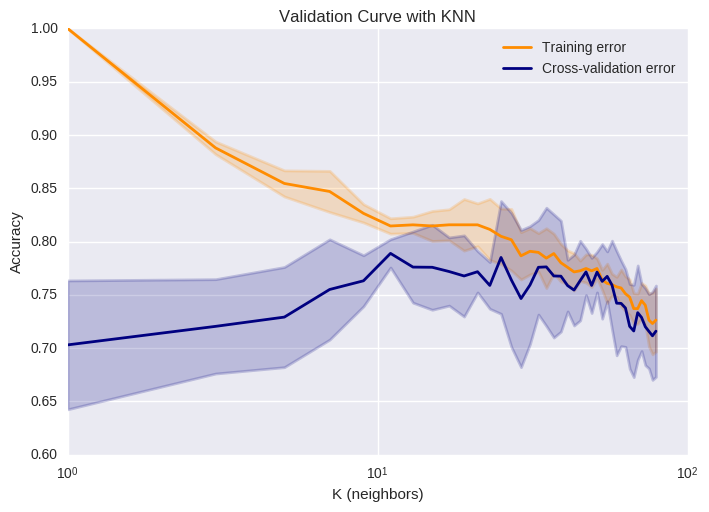

In [12]:
from sklearn.model_selection import validation_curve

    
param_range = np.asarray(neighbors)
train_scores, test_scores = validation_curve(KNeighborsClassifier(), X_train_scaled, y_train,
                                            param_name='n_neighbors',
                                            param_range=param_range, cv=5, scoring = 'accuracy')

plt.figure()

train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

plt.title('Validation Curve with KNN')
plt.xlabel('K (neighbors)')
plt.ylabel('Accuracy')
plt.ylim(0.6, 1)
lw = 2

plt.semilogx(param_range, train_scores_mean, label='Training error',
            color='darkorange', lw=lw)

plt.fill_between(param_range, train_scores_mean - train_scores_std,
                train_scores_mean + train_scores_std, alpha=0.2,
                color='darkorange', lw=lw)

plt.semilogx(param_range, test_scores_mean, label='Cross-validation error',
            color='navy', lw=lw)

plt.fill_between(param_range, test_scores_mean - test_scores_std,
                test_scores_mean + test_scores_std, alpha=0.2,
                color='navy', lw=lw)

plt.legend(loc='best')
plt.show()

### Evaluate the accuracy of the classifier using the test data 

In [8]:
from sklearn.metrics import confusion_matrix
knn_fit = KNeighborsClassifier(n_neighbors = 39).fit(X_train_scaled, y_train)
knn_predicted = knn_fit.predict(X_test_scaled)
knn_confusion = confusion_matrix(y_test, knn_predicted)
print ('K nearest neighbors classifier \n', knn_confusion)

K nearest neighbors classifier 
 [[43 11]
 [10 14]]


In [40]:
knn_fit.score(X_test_scaled, y_test)

0.73076923076923073

In [39]:
# Combined report with all metrics
from sklearn.metrics import classification_report

print(classification_report(y_test, knn_predicted, target_names = ['Abnormal (0)', 'Normal (1)']))

              precision    recall  f1-score   support

Abnormal (0)       0.81      0.80      0.80        54
  Normal (1)       0.56      0.58      0.57        24

 avg / total       0.73      0.73      0.73        78



### ROC curves, Area Under Curve (AUC) for KNN 
- In python, we do not a decision function for KNN like logistic regression or SVM.
- KNN makes decision based on majority vote among the neighbors. "knn.predict_proba(X_test)" provides the probability of a future observation falls into different classes.
- We have two classes for this data, the first column in "knn_fit.predict_proba(X_test_scaled)" is the probability of one observation belongs to class 0 and second column is the probability of one observation belongs to class 1.
- Let's check to see if that make sense. We can see when the probability of one observation belongs to certain class is over 0.5, this observation will be classified to that class.

In [33]:
print ('col 1 is the prob of one observation belongs to class 0 \n col 2 is the prob of one observation belongs to class 1')
print (knn_fit.predict_proba(X_test_scaled)[1:6,:], '\n')

print ('predicted class label')
print (knn_predicted[1:6])

col 1 is the prob of one observation belongs to class 0 
 col 2 is the prob of one observation belongs to class 1
[[ 0.84615385  0.15384615]
 [ 0.46153846  0.53846154]
 [ 0.71794872  0.28205128]
 [ 0.48717949  0.51282051]
 [ 0.46153846  0.53846154]] 

predicted class label
[0 1 0 1 1]


### We can use "knn_fit.predict_proba(X_test_scaled" as score to draw the ROC curve

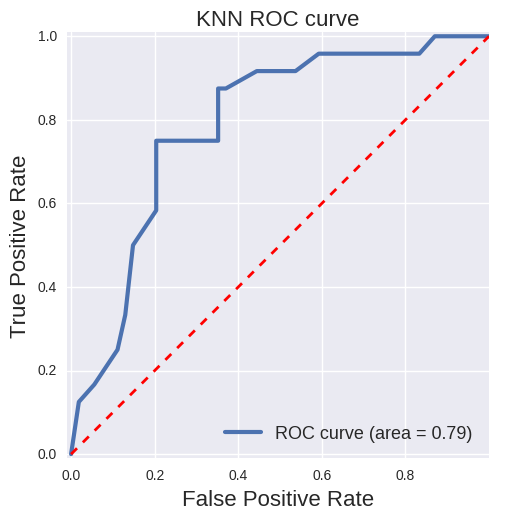

In [34]:
from sklearn.metrics import roc_curve, auc

fpr_knn, tpr_knn, _ = roc_curve(y_test, knn_fit.predict_proba(X_test_scaled)[:,1])
roc_auc_knn = auc(fpr_knn, tpr_knn)
plt.figure()
plt.xlim([-0.01, 1.00])
plt.ylim([-0.01, 1.01])
plt.plot(fpr_lr, tpr_lr, lw = 3, label = 'ROC curve (area = {:0.2f})'.format(roc_auc_knn))
plt.xlabel('False Positive Rate', fontsize = 16)
plt.ylabel('True Positive Rate', fontsize = 16)
plt.title('KNN ROC curve', fontsize = 16)
plt.legend(loc = 'lower right', fontsize = 13)
plt.plot([0, 1], [0, 1], color = 'red', lw = 2, linestyle = '--')
plt.axes().set_aspect('equal')
plt.show()

### We can also construct ROC from scratch to get the same ROC curve

In [22]:
y_test1 = y_test.as_matrix().ravel()
thresholds = np.linspace(1,0,101)
ROC = np.zeros((101,2))
for i in range(101):
    t = thresholds[i]
    TP_t = np.logical_and(knn_fit.predict_proba(X_test_scaled)[:,1] > t, y_test1 == 1).sum()
    TN_t = np.logical_and(knn_fit.predict_proba(X_test_scaled)[:,1] <= t, y_test1 == 0).sum()
    FP_t = np.logical_and(knn_fit.predict_proba(X_test_scaled)[:,1] > t, y_test1 == 0).sum()
    FN_t = np.logical_and(knn_fit.predict_proba(X_test_scaled)[:,1] <= t, y_test1 == 1).sum()
    
    FPR_t = FP_t / float(FP_t + TN_t)
    ROC[i, 0] = FPR_t
    
    TPR_t = TP_t / float(TP_t + FN_t)
    ROC[i, 1] = TPR_t

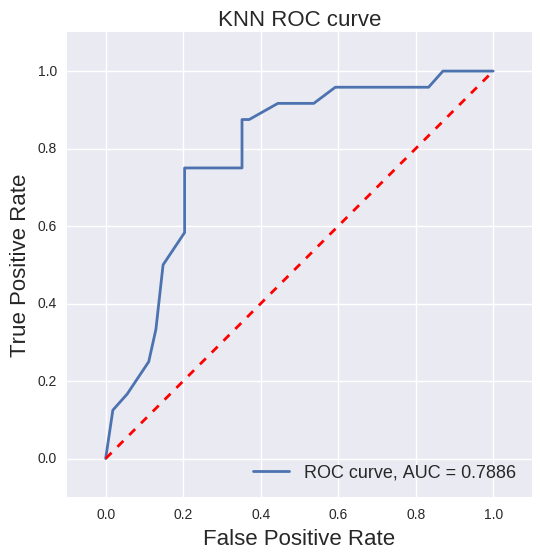

In [23]:
# we compute the AUC score for the ROC curve using the trapezoidal method, and show the plot.
AUC = 0.
for i in range(100):
    AUC += (ROC[i+1,0]-ROC[i,0]) * (ROC[i+1,1]+ROC[i,1])
AUC *= 0.5

fig = plt.figure(figsize = (6,6))
plt.plot(ROC[:,0], ROC[:,1], lw =2, label = 'ROC curve, AUC = %.4f'%AUC)
plt.xlim(-0.1, 1.1)
plt.ylim(-0.1, 1.1)
plt.xlabel('False Positive Rate', fontsize = 16)
plt.ylabel('True Positive Rate', fontsize = 16)
plt.title('KNN ROC curve', fontsize = 16)
plt.legend(loc = 'lower right', fontsize = 13)
plt.plot([0, 1], [0, 1], color = 'red', lw = 2, linestyle = '--')
plt.axes().set_aspect('equal')

plt.show()


## Logistic regression

### Obtain the lowest bound for C such that for C in (l1_min_c, $\infty$) the model is guaranteed not to be empty.

In [16]:
from sklearn.svm import l1_min_c
C_min = l1_min_c(X_train, y_train, loss = 'log') # loss = 'log' is the loss of logistic regression models

In [17]:
from sklearn.linear_model import LogisticRegression

#metrics = ['accuracy', 'precision', 'recall', 'roc_auc', 'f1']
metrics = ['accuracy', 'recall']

#L1_reg_parameter = np.arange(1, 100, 10) 
L1_reg_parameter = [C_min, 0.1, 1, 1.5, 2, 3, 5, 10, 100, 500]
grid_values = {'C': L1_reg_parameter}

lr_cv = LogisticRegression(penalty = 'l1')

for metric in metrics:
    print ("Tuning regularization-parameter C using %s" % metric)
    
    grid_lr = GridSearchCV(lr_cv, param_grid = grid_values, cv = 5, scoring = '%s' % metric)
    grid_lr.fit(X_train, y_train)
    
    print('Grid best parameter (max. %s): ' % metric , grid_lr.best_params_)
    print('Grid best score (%s): ' % metric , grid_lr.best_score_, '\n')
   

Tuning regularization-parameter C using accuracy
Grid best parameter (max. accuracy):  {'C': 2}
Grid best score (accuracy):  0.840517241379 

Tuning regularization-parameter C using recall
Grid best parameter (max. recall):  {'C': 0.1}
Grid best score (recall):  0.789655172414 



### Validation curve

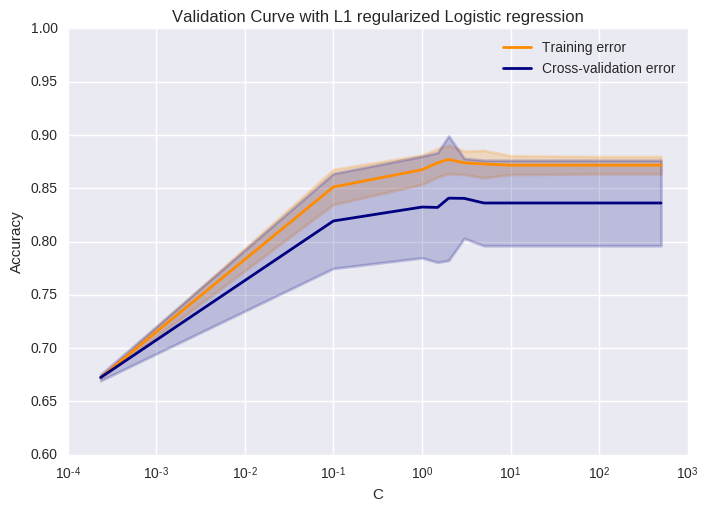

In [18]:
# from sklearn.model_selection import validation_curve

param_range = np.asarray(L1_reg_parameter)
train_scores, test_scores = validation_curve(LogisticRegression(penalty = 'l1'), X_train, y_train,
                                            param_name='C',
                                            param_range=param_range, cv=5, scoring = 'accuracy')

plt.figure()

train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

plt.title('Validation Curve with L1 regularized Logistic regression')
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.ylim(0.6, 1)
lw = 2

plt.semilogx(param_range, train_scores_mean, label='Training error',
            color='darkorange', lw=lw)

plt.fill_between(param_range, train_scores_mean - train_scores_std,
                train_scores_mean + train_scores_std, alpha=0.2,
                color='darkorange', lw=lw)

plt.semilogx(param_range, test_scores_mean, label='Cross-validation error',
            color='navy', lw=lw)

plt.fill_between(param_range, test_scores_mean - test_scores_std,
                test_scores_mean + test_scores_std, alpha=0.2,
                color='navy', lw=lw)

plt.legend(loc='best')
plt.show()

### Lasso Path

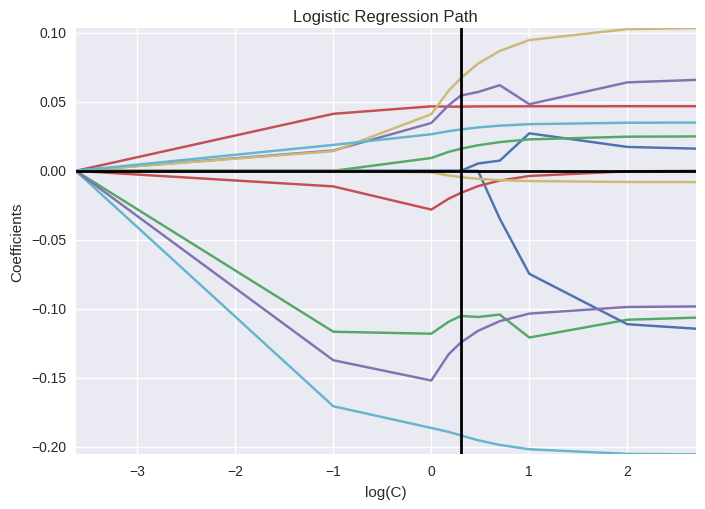

In [19]:
coefs = []

for c in L1_reg_parameter:
    lr_cv.set_params(C = c)
    lr_cv.fit(X_train, y_train)
    coefs.append(lr_cv.coef_.ravel().copy())

coefs = np.array(coefs)
plt.plot(np.log10(L1_reg_parameter), coefs)
ymin, ymax = plt.ylim()
plt.xlabel('log(C)')
plt.ylabel('Coefficients')
plt.title('Logistic Regression Path')
plt.axis('tight')
plt.axhline(y = 0, linewidth=2, color = 'k')
plt.axvline(x = np.log10(2), linewidth=2, color='k')
plt.show()

In [7]:
# fit the model choosen by cross validation
lr = LogisticRegression(penalty = 'l1', C = 2)
lr_fit = lr.fit(X_train, y_train)
lr_fit_coef = lr_fit.coef_
lr_fit_predicted = lr_fit.predict(X_test) 

### Check out the coefficients

In [14]:
name = ['Pelvic Incidence','Pelvic Tilt','Lumbar Lordosis Angle','Sacral Slope', 'Pelvic Radius', 'Spondylolisthesis Degree', 'Pelvic Slope', 'Direct Tilt',
        'Thoracic Slope', 'Cervical Tilt','Sacrum Angle', 'Scoliosis Slope']

coef = lr_fit_coef[0].tolist()

temp = sorted(list(zip(name, coef)), key = lambda e: -abs(e[1]))
print('Features sorted by absolute magnitude:')
for e in temp:
    print ('\t{}, {:.3f}'.format(e[0], e[1]))

Features sorted by absolute magnitude:
	Spondylolisthesis Degree, -0.192
	Cervical Tilt, -0.124
	Pelvic Tilt, -0.105
	Pelvic Radius, 0.067
	Sacral Slope, 0.055
	Lumbar Lordosis Angle, 0.047
	Scoliosis Slope, 0.030
	Direct Tilt, 0.016
	Thoracic Slope, -0.016
	Sacrum Angle, -0.005
	Pelvic Incidence, 0.000
	Pelvic Slope, 0.000


In [21]:
lr_confusion = confusion_matrix(y_test, lr_fit_predicted)
print ('Logistic regression classifier \n', lr_confusion)

Logistic regression classifier 
 [[47  7]
 [ 5 19]]


In [22]:
print(classification_report(y_test, lr_fit_predicted, target_names = ['Abnormal (0)', 'Normal (1)']))

              precision    recall  f1-score   support

Abnormal (0)       0.90      0.87      0.89        54
  Normal (1)       0.73      0.79      0.76        24

 avg / total       0.85      0.85      0.85        78



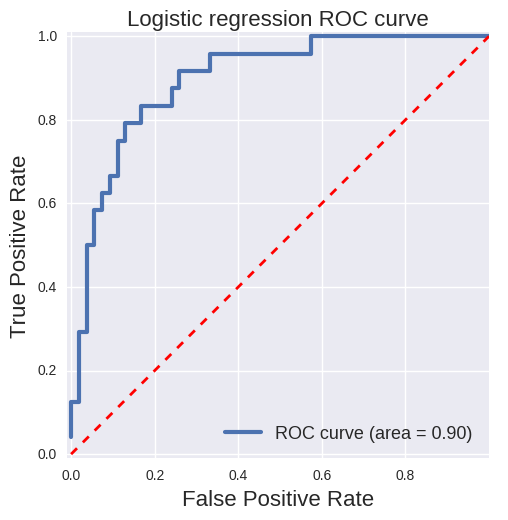

In [102]:
from sklearn.metrics import roc_curve, auc

y_score_lr = lr_fit.decision_function(X_test)
fpr_lr, tpr_lr, _ = roc_curve(y_test, y_score_lr)
roc_auc_lr = auc(fpr_lr, tpr_lr)
plt.figure()
plt.xlim([-0.01, 1.00])
plt.ylim([-0.01, 1.01])
plt.plot(fpr_lr, tpr_lr, lw = 3, label = 'ROC curve (area = {:0.2f})'.format(roc_auc_lr))
plt.xlabel('False Positive Rate', fontsize = 16)
plt.ylabel('True Positive Rate', fontsize = 16)
plt.title('Logistic regression ROC curve', fontsize = 16)
plt.legend(loc = 'lower right', fontsize = 13)
plt.plot([0, 1], [0, 1], color = 'red', lw = 2, linestyle = '--')
plt.axes().set_aspect('equal')
plt.show()

## Support Vector Machine

### Linear SVM (L1 penalty)

In [95]:
from sklearn.svm import LinearSVC
from sklearn.model_selection import GridSearchCV

#metrics = ['accuracy', 'precision', 'recall', 'roc_auc', 'f1']
metrics = ['accuracy', 'recall']


lsvc_parameter = [0.001, 0.01, 0.1, 1, 1.5, 3, 5, 10, 100, 1000, 10000]
#lsvc_parameter = np.logspace(-3, 3, 10)
grid_values = {'C': lsvc_parameter}

#lsvc_cv = LinearSVC(penalty = 'l1', loss = 'squared_hinge', dual = False)
lsvc_cv = LinearSVC(penalty = 'l2', loss = 'squared_hinge', dual = True)

for metric in metrics:
    print ("Tuning regularization-parameter C using %s" % metric)
    
    grid_lsvc = GridSearchCV(lsvc_cv, param_grid = grid_values, cv = 5, scoring = '%s' % metric)
    grid_lsvc.fit(X_train_scaled, y_train)
    
    print('Grid best parameter (max. %s): ' % metric , grid_lsvc.best_params_)
    print('Grid best score (%s): ' % metric , grid_lsvc.best_score_, '\n')

Tuning regularization-parameter C using accuracy
Grid best parameter (max. accuracy):  {'C': 0.1}
Grid best score (accuracy):  0.853448275862 

Tuning regularization-parameter C using recall
Grid best parameter (max. recall):  {'C': 1000}
Grid best score (recall):  0.816379310345 



### Validation curve

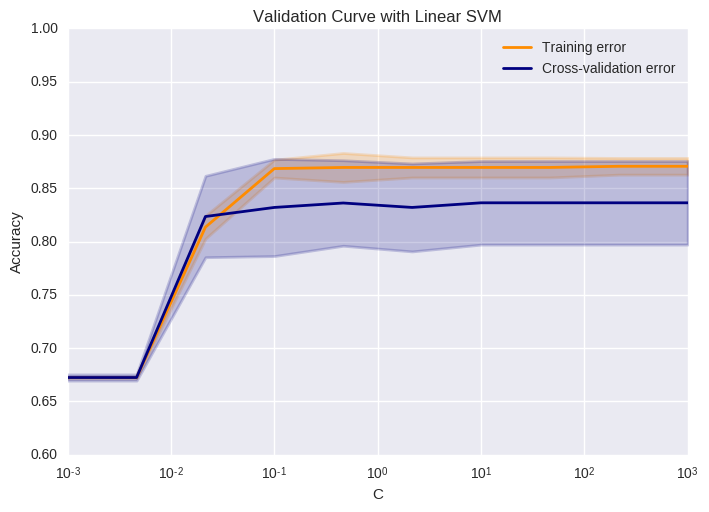

In [76]:
from sklearn.model_selection import validation_curve

param_range = np.asarray(lsvc_parameter)
train_scores, test_scores = validation_curve(LinearSVC(penalty = 'l1', loss = 'squared_hinge', dual = False),
                                             X_train_scaled, y_train,  param_name='C', param_range = param_range, 
                                             cv = 5, scoring = 'accuracy')

plt.figure()

train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

plt.title('Validation Curve with Linear SVM')
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.ylim(0.6, 1)
lw = 2

plt.semilogx(param_range, train_scores_mean, label='Training error',
            color='darkorange', lw=lw)

plt.fill_between(param_range, train_scores_mean - train_scores_std,
                train_scores_mean + train_scores_std, alpha=0.2,
                color='darkorange', lw=lw)

plt.semilogx(param_range, test_scores_mean, label='Cross-validation error',
            color='navy', lw=lw)

plt.fill_between(param_range, test_scores_mean - test_scores_std,
                test_scores_mean + test_scores_std, alpha=0.2,
                color='navy', lw=lw)

plt.legend(loc='best')
plt.show()

In [36]:
# fit the model chosen by cross validation: 
lsvc = LinearSVC(penalty = 'l1', loss = 'squared_hinge', dual = False, C = 0.46)
#lsvc = LinearSVC(penalty = 'l2', loss = 'squared_hinge', dual = True, C = 46)
lsvc_fit = lsvc.fit(X_train_scaled, y_train)
lsvc_fit_predicted = lsvc.predict(X_test_scaled)

In [100]:
lsvc_confusion = confusion_matrix(y_test, lsvc_fit_predicted)
print('Linear SVM \n', lsvc_confusion)

Linear SVM 
 [[47  7]
 [ 6 18]]


In [37]:
lsvc_fit.score(X_test_scaled, y_test)

0.83333333333333337

In [41]:
print(classification_report(y_test, lsvc_fit_predicted, target_names = ['Abnormal (0)', 'Normal (1)']))

              precision    recall  f1-score   support

Abnormal (0)       0.89      0.87      0.88        54
  Normal (1)       0.72      0.75      0.73        24

 avg / total       0.84      0.83      0.83        78



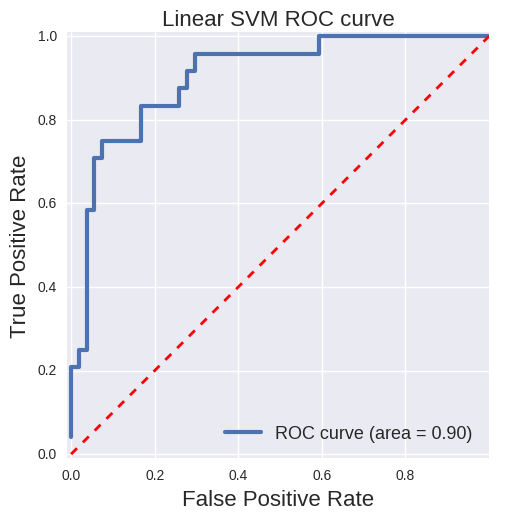

In [101]:
y_score_lsvc = lsvc_fit.decision_function(X_test_scaled)
fpr_lsvc, tpr_lsvc, _ = roc_curve(y_test, y_score_lsvc)
roc_auc_lsvc = auc(fpr_lsvc, tpr_lsvc)
plt.figure()
plt.xlim([-0.01, 1.00])
plt.ylim([-0.01, 1.01])
plt.plot(fpr_lsvc, tpr_lsvc, lw = 3, label = 'ROC curve (area = {:0.2f})'.format(roc_auc_lsvc))
plt.xlabel('False Positive Rate', fontsize = 16)
plt.ylabel('True Positive Rate', fontsize = 16)
plt.title('Linear SVM ROC curve', fontsize = 16)
plt.legend(loc = 'lower right', fontsize = 13)
plt.plot([0, 1], [0, 1], color = 'red', lw = 2, linestyle = '--')
plt.axes().set_aspect('equal')
plt.show()

### Kernelized  SVM 

In [52]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

#metrics = ['accuracy', 'precision', 'recall', 'roc_auc', 'f1']
metrics = ['accuracy', 'recall']

svc_parameters = {'gamma': [0.001, 0.01, 0.05, 0.1, 1, 10, 100], 'C':[0.001, 0.01, 0.1, 1, 1.5, 3, 5, 10, 100, 1000, 10000]}
#lsvc_parameter = np.logspace(-3, 3, 10)

#grid_values = {'C': lsvc_parameter}

#lsvc_cv = LinearSVC(penalty = 'l1', loss = 'squared_hinge', dual = False)
svc_cv = SVC(kernel='rbf')

for metric in metrics:
    print ("Tuning regularization-parameter C using %s" % metric)
    
    grid_svc = GridSearchCV(svc_cv, param_grid = svc_parameters, cv = 5, scoring = '%s' % metric)
    grid_svc.fit(X_train_scaled, y_train)
    
    print('Grid best parameter (max. %s): ' % metric , grid_svc.best_params_)
    print('Grid best score (%s): ' % metric , grid_svc.best_score_, '\n')

Tuning regularization-parameter C using accuracy
Grid best parameter (max. accuracy):  {'gamma': 0.001, 'C': 100}
Grid best score (accuracy):  0.844827586207 

Tuning regularization-parameter C using recall
Grid best parameter (max. recall):  {'gamma': 0.001, 'C': 100}
Grid best score (recall):  0.789367816092 



In [62]:
svc = SVC(C = 100, kernel='rbf', gamma = 0.001)
svc_fit = svc.fit(X_train_scaled, y_train)
svc_fit_predicted = svc.predict(X_test_scaled)

In [63]:
svc_confusion = confusion_matrix(y_test, svc_fit_predicted)
print('Linear SVM \n', svc_confusion)

Linear SVM 
 [[45  9]
 [ 5 19]]


In [64]:
print(svc_fit.score(X_test_scaled, y_test))

0.820512820513


In [60]:
print(classification_report(y_test, svc_fit_predicted, target_names = ['Abnormal (0)', 'Normal (1)']))

              precision    recall  f1-score   support

Abnormal (0)       0.84      0.85      0.84        54
  Normal (1)       0.65      0.62      0.64        24

 avg / total       0.78      0.78      0.78        78



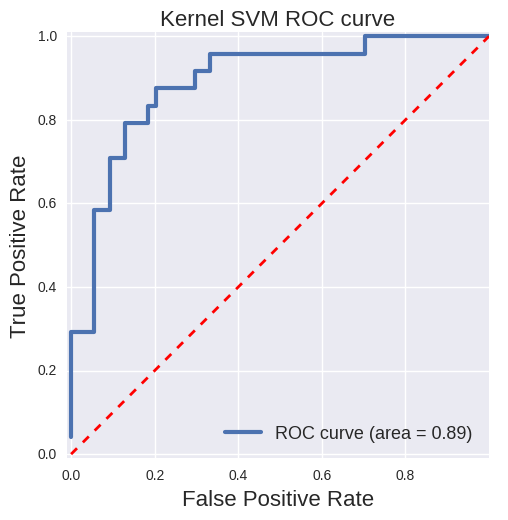

In [65]:
y_score_svc = svc_fit.decision_function(X_test_scaled)
fpr_svc, tpr_svc, _ = roc_curve(y_test, y_score_svc)
roc_auc_svc = auc(fpr_svc, tpr_svc)
plt.figure()
plt.xlim([-0.01, 1.00])
plt.ylim([-0.01, 1.01])
plt.plot(fpr_svc, tpr_svc, lw = 3, label = 'ROC curve (area = {:0.2f})'.format(roc_auc_svc))
plt.xlabel('False Positive Rate', fontsize = 16)
plt.ylabel('True Positive Rate', fontsize = 16)
plt.title('Kernel SVM ROC curve', fontsize = 16)
plt.legend(loc = 'lower right', fontsize = 13)
plt.plot([0, 1], [0, 1], color = 'red', lw = 2, linestyle = '--')
plt.axes().set_aspect('equal')
plt.show()

### Decision Trees

In [ ]:
from sklearn.tree import DecisionTreeClassifier

